In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [128]:
df = pd.read_csv("WaterData.csv")
df.describe()

,Date,Plant,Type,AirTemp,WaterTemp,RawPh,SettledPh,RawTurb,SettleTurb,RawFlowMGD,BasinSizeMG,MixerSpeed,SettleTime,SolidsRemoved,Dosage
0,02/16/18,1,1,37,49,7.88,7.79,0.86,0.11,5.613,1.0,30,20,0.9054,9.8
1,02/16/18,1,1,37,49,7.88,7.79,0.86,0.14,5.613,1.0,30,20,0.8796,8.5
2,02/16/18,1,1,37,49,7.88,7.79,0.86,0.12,5.613,1.0,30,20,0.8968,11.8
3,02/16/18,1,1,37,49,7.88,7.79,0.86,0.08,5.613,1.0,30,20,0.9312,13.0
4,03/09/18,1,1,51,50,7.96,7.63,1.01,0.11,5.048,1.0,30,20,0.8889,11.5


In [129]:
df.head()

,Date,Plant,Type,AirTemp,WaterTemp,RawPh,SettledPh,RawTurb,SettleTurb,RawFlowMGD,BasinSizeMG,MixerSpeed,SettleTime,SolidsRemoved,Dosage
0,02/16/18,1,1,37,49,7.88,7.79,0.86,0.11,5.613,1.0,30,20,0.9054,9.8
1,02/16/18,1,1,37,49,7.88,7.79,0.86,0.14,5.613,1.0,30,20,0.8796,8.5
2,02/16/18,1,1,37,49,7.88,7.79,0.86,0.12,5.613,1.0,30,20,0.8968,11.8
3,02/16/18,1,1,37,49,7.88,7.79,0.86,0.08,5.613,1.0,30,20,0.9312,13.0
4,03/09/18,1,1,51,50,7.96,7.63,1.01,0.11,5.048,1.0,30,20,0.8889,11.5


In [119]:
cdf = df[['Type', 'AirTemp', 'WaterTemp', 'RawPh', 'SettledPh', 'RawTurb', 'MixerSpeed', 'SettleTime', 'SolidsRemoved', 'Dosage']]


In [120]:
X = cdf.iloc[:, :9].values
y = cdf.iloc[:, -1].values

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [122]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [123]:
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [124]:
pickle.dump(regressor, open('watermodel.pkl', 'wb'))

In [125]:
import seaborn as sns
%matplotlib inline

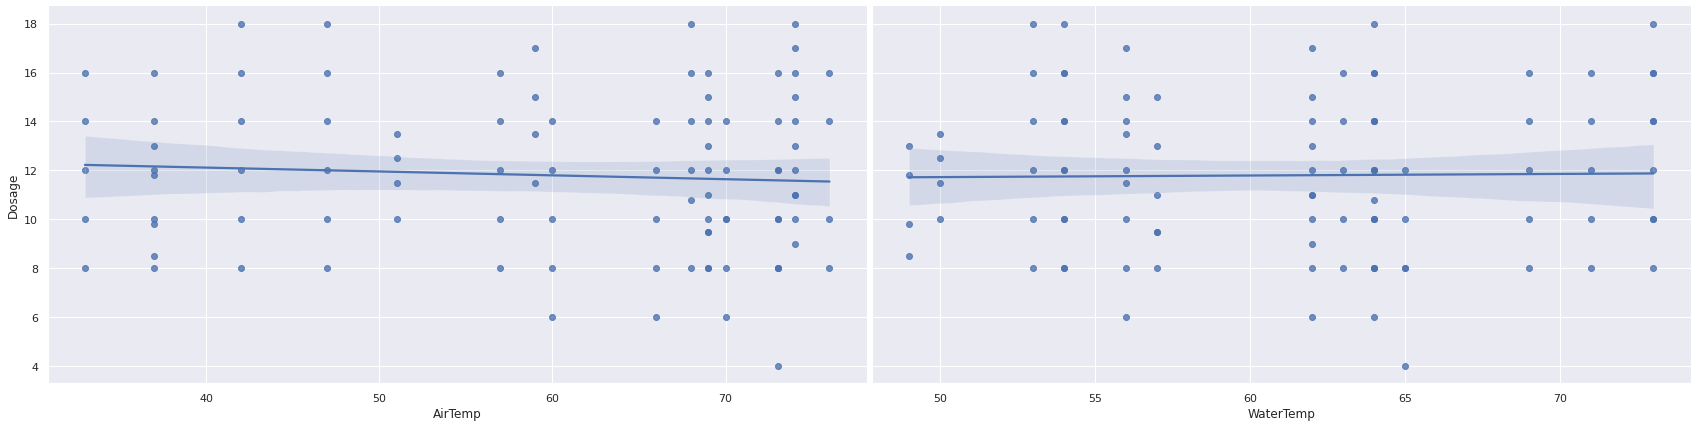

In [126]:
sns.pairplot(df, x_vars=['AirTemp', 'WaterTemp'], y_vars='Dosage', height=6, aspect=2, kind='reg')
sns.set(font_scale=1)

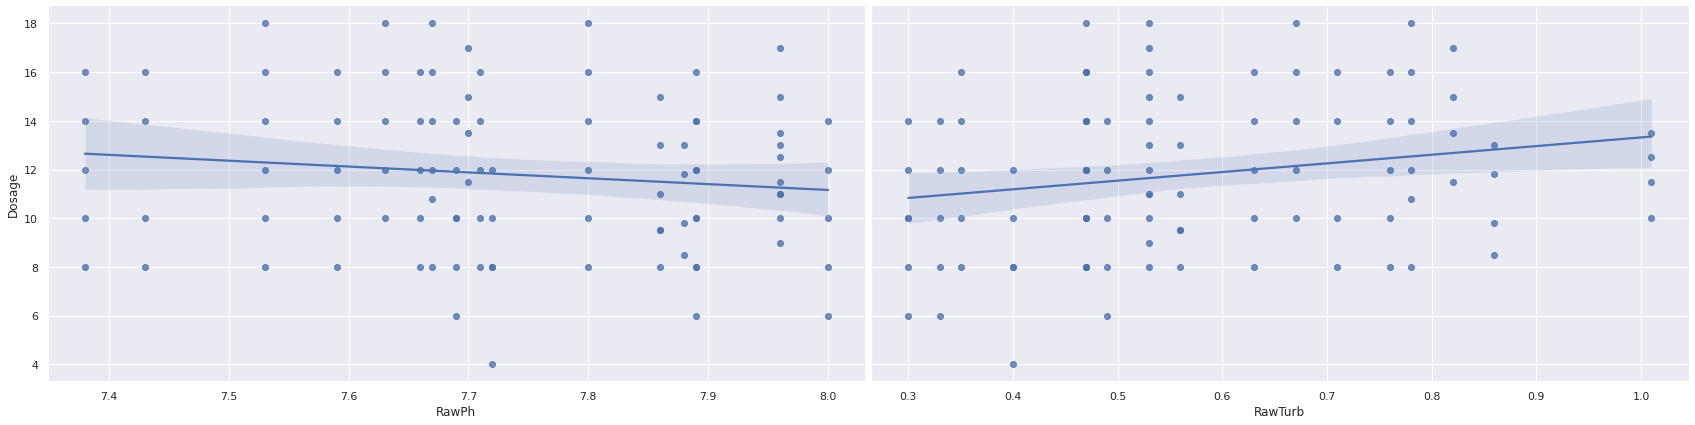

In [127]:
sns.pairplot(df, x_vars=['RawPh', 'RawTurb'], y_vars='Dosage', height=6, aspect=2, kind='reg')
sns.set(font_scale=1)